In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [4]:
data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [8]:
import seaborn as sns

C:\Users\apara\AppData\Local\Temp\ipykernel_21128\3699662048.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Temp\ipykernel_21128\3699662048.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\T

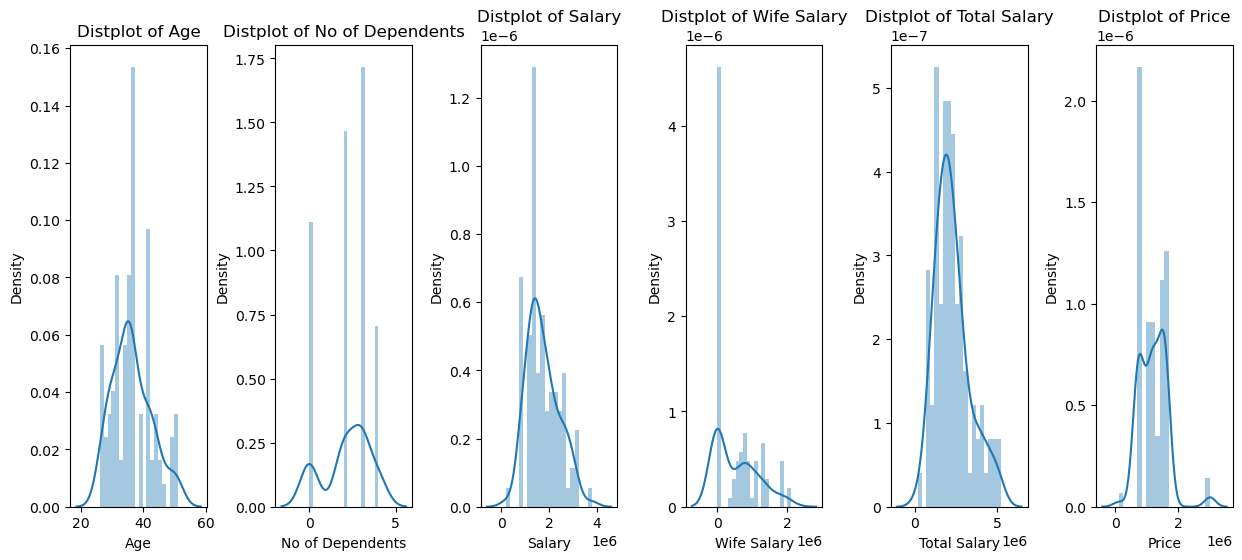

In [9]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

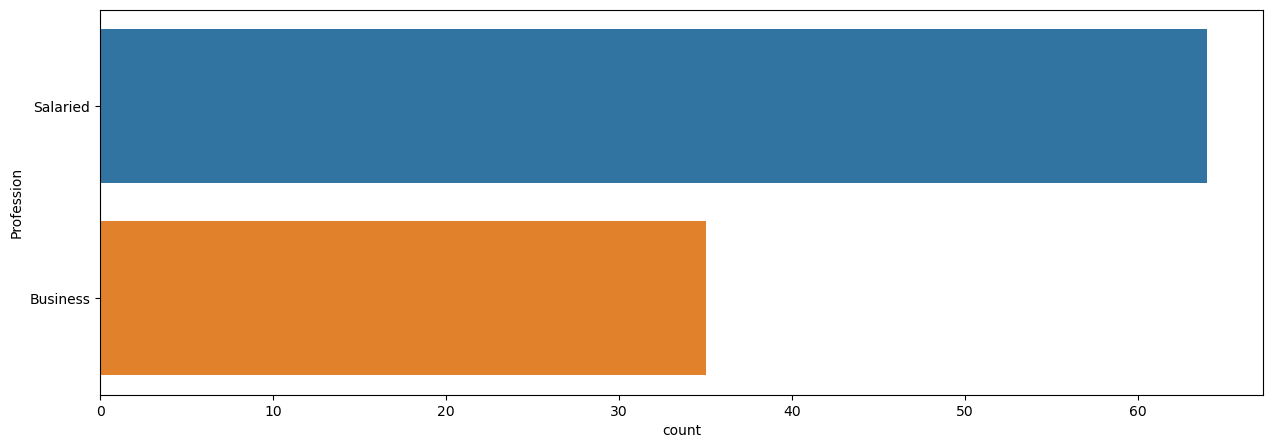

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profession',data=data)
plt.show()
     

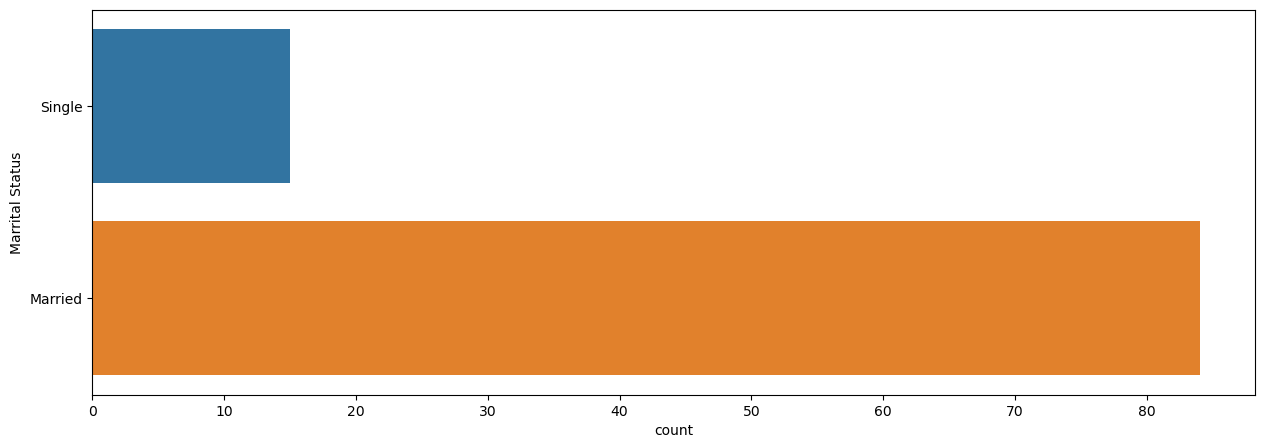

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Marrital Status',data=data)
plt.show()

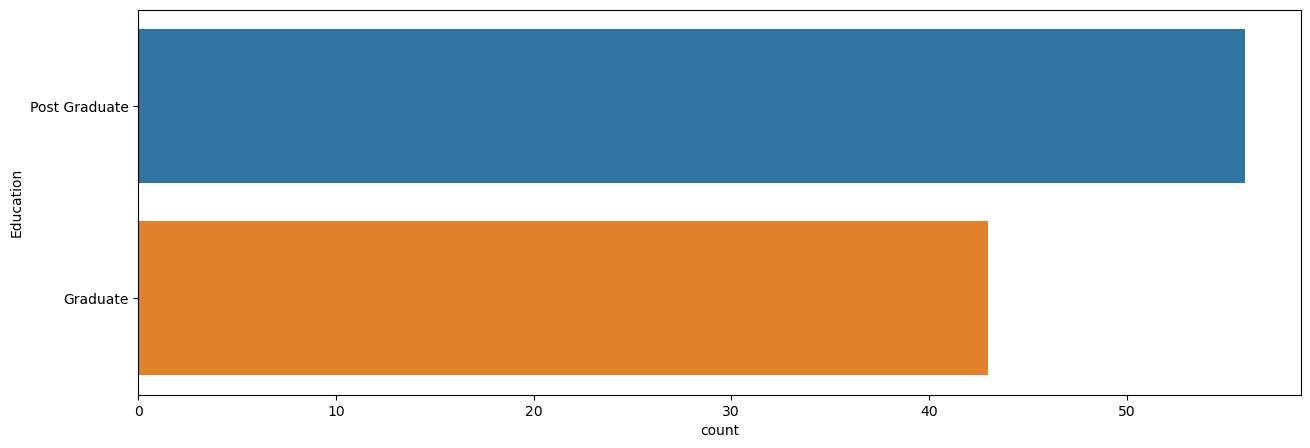

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='Education',data=data)
plt.show()

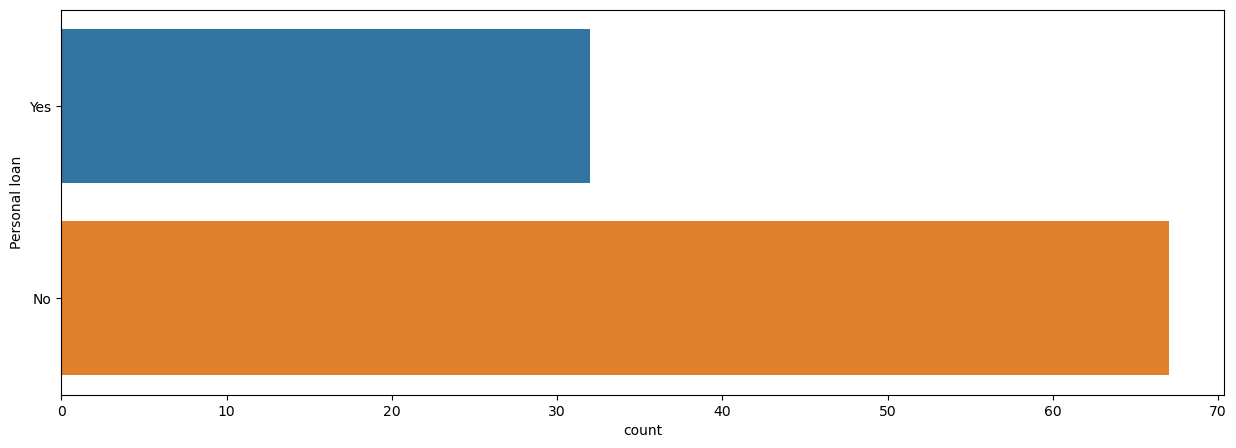

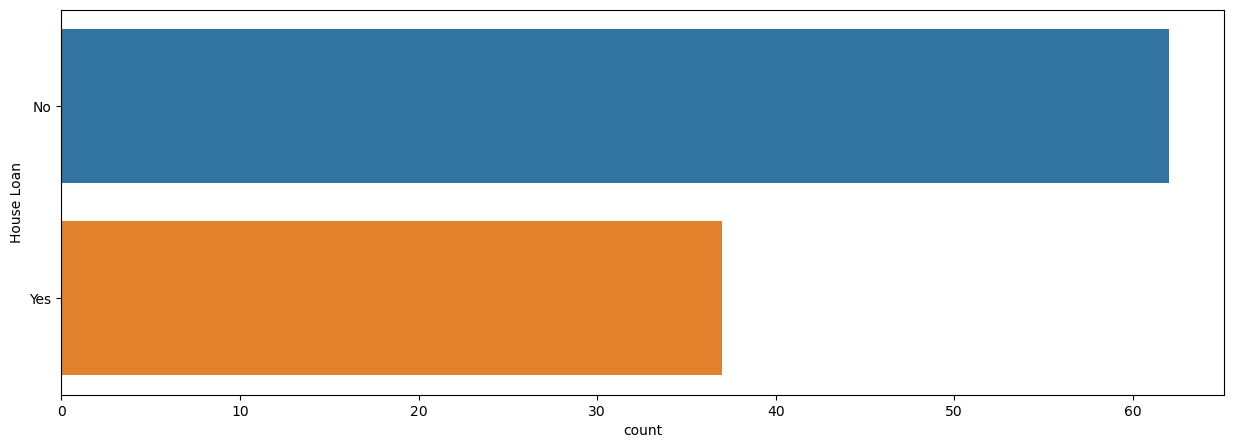

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='Personal loan',data=data)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(y='House Loan',data=data)
plt.show()

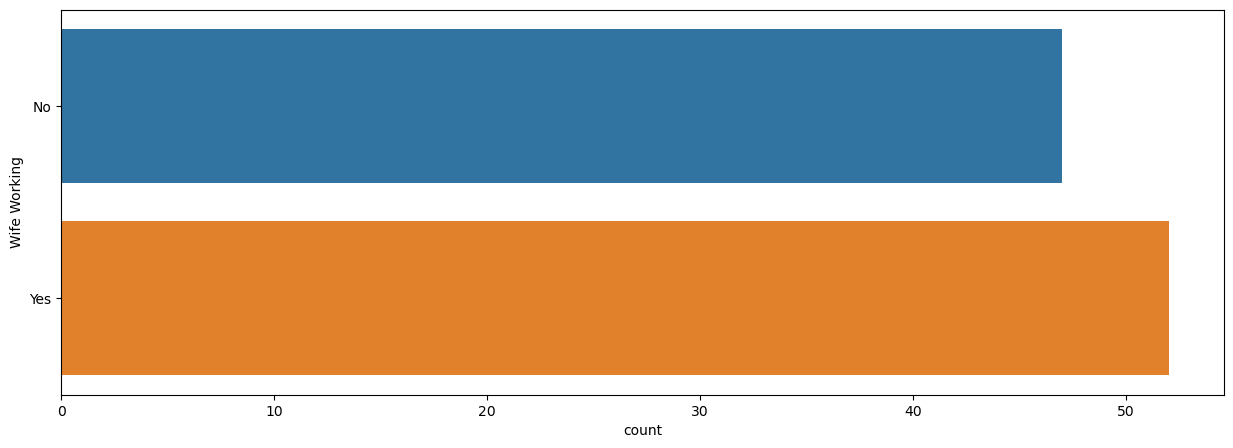

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working',data=data)
plt.show()
     

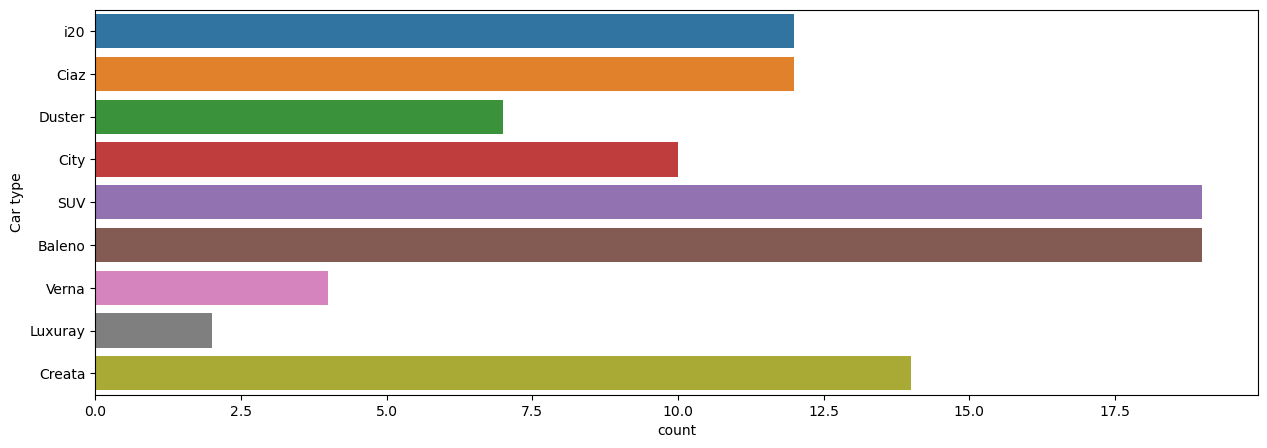

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=data)
plt.ylabel('Car type')
plt.show()

<Axes: xlabel='Make', ylabel='count'>

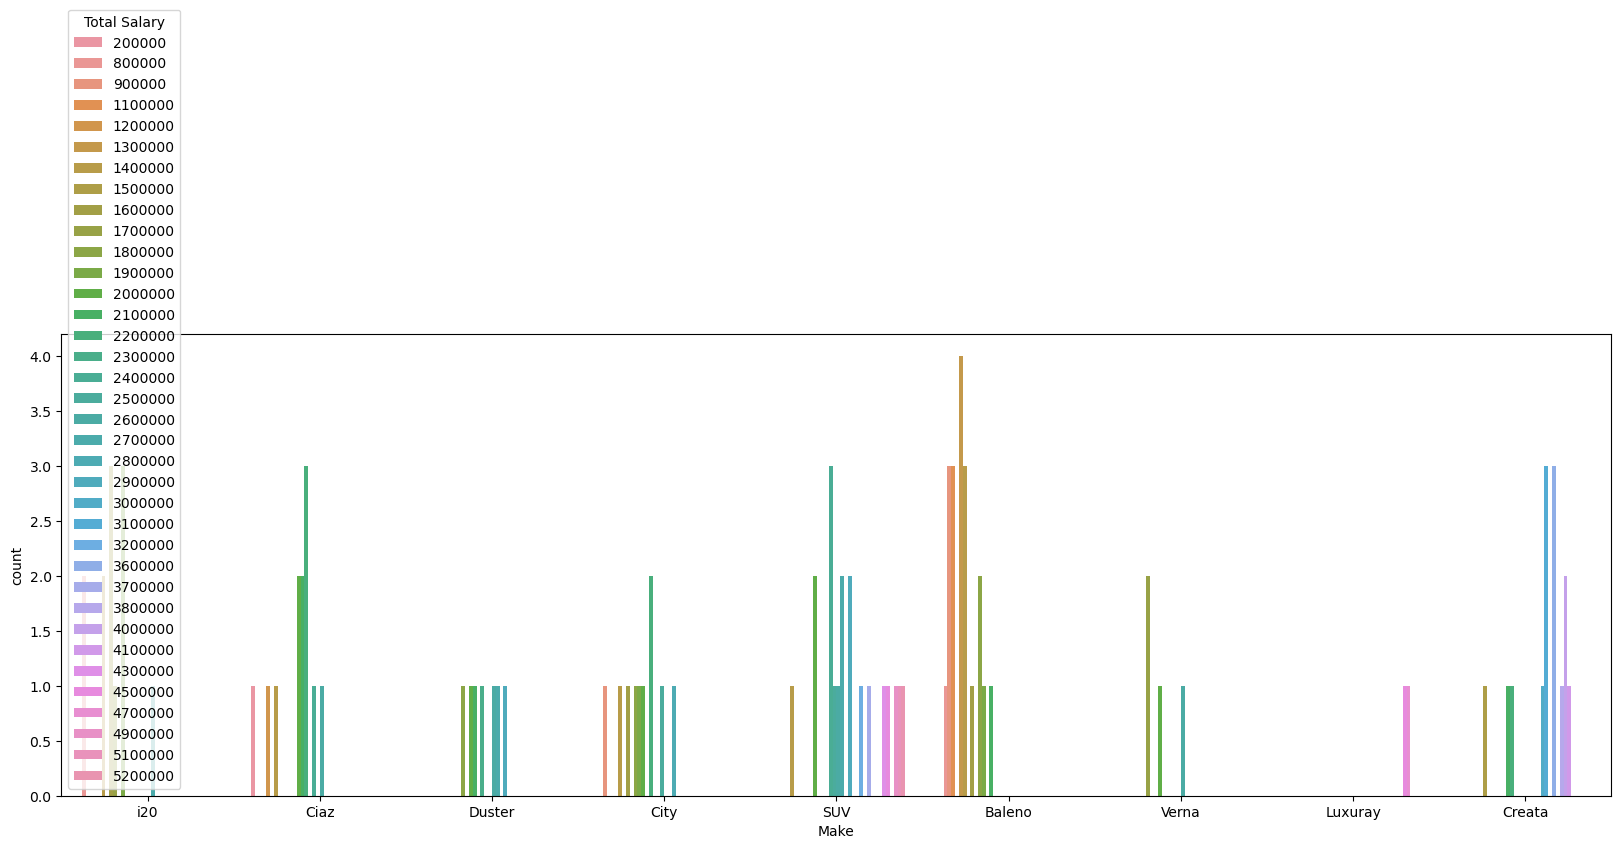

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Total Salary")

<Axes: xlabel='Make', ylabel='count'>

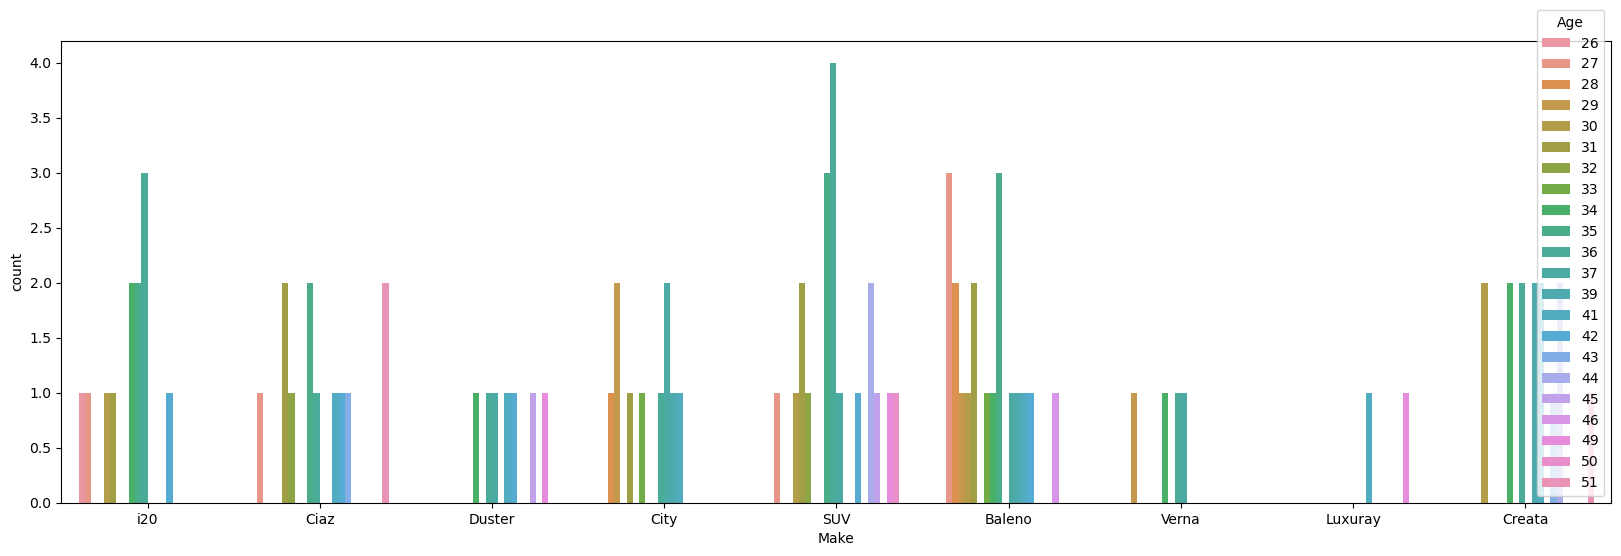

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue="Age")

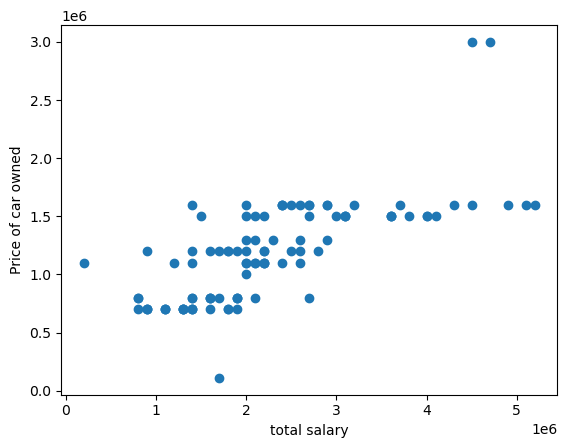

In [22]:
#A scatter plot of total salary against the price of the car owned.
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(data['Total Salary'],data['Price'])

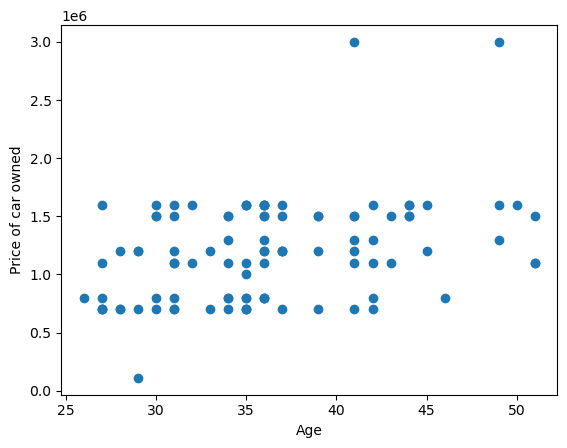

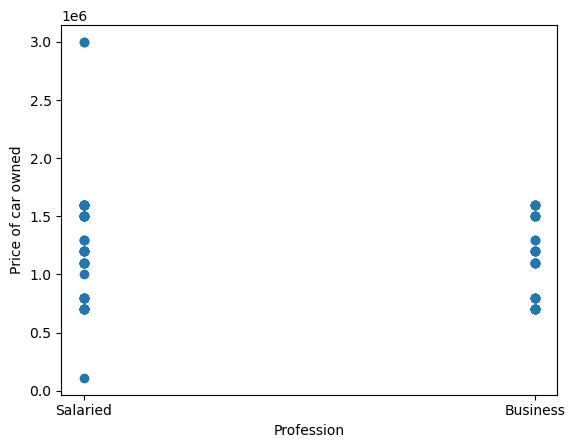

In [23]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(data['Age'],data['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(data['Profession'],data['Price'])
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder


cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [25]:
data_price = data.drop('Make',axis=1)
data_price.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [26]:
data_car = data.drop('Price',axis=1)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,i20
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV


In [27]:
le = LabelEncoder()
data_car.Make = le.fit_transform(data_car.Make)
data_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6


In [29]:
#Clustering According to the price of the vehicle owned

features = list(data_price.columns)
d = data_price[features] 
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Price']

In [34]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
d['clusters'] = clustering_kmeans.fit_predict(d)     
d

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,27,1,1,1,0,1,0,0,800000,0,800000,800000,0
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000,0
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000,0
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000,0
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,1600000,0
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,1600000,1
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1100000,0
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,1500000,1


Text(0, 0.5, 'Total salary')

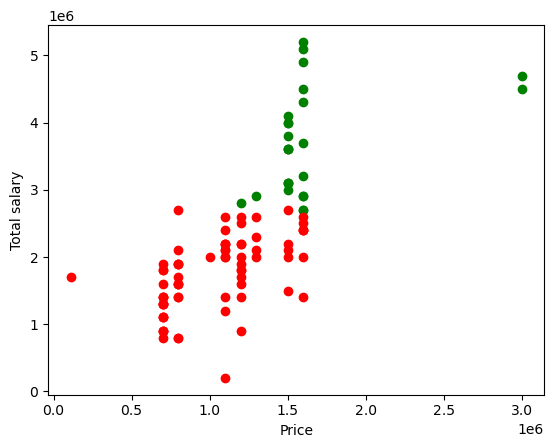

In [35]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'],color='green')
plt.scatter(d0.Price, d0['Total Salary'],color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [36]:
from sklearn.preprocessing import MinMaxScaler
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled
     
x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled

x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled

x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

d['clusters'] = clustering_kmeans.fit_predict(d) 
d

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,0
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,0


C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Total salary')

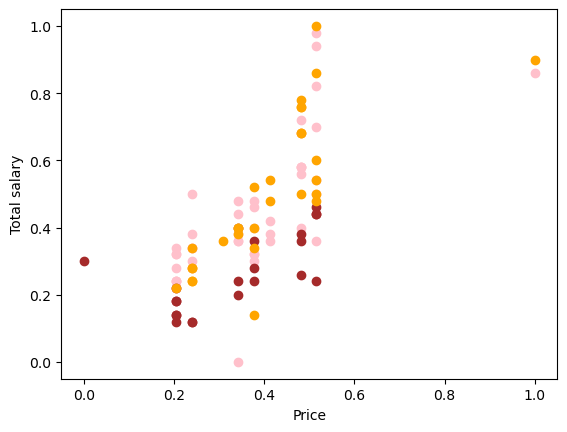

In [44]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 


d1 = d[d.clusters==1]
d0 = d[d.clusters==0]

d2 = d[d.clusters==2]
#d3 = d[d.clusters==3]
plt.scatter(d1.Price, d1['Total Salary'],color='pink')
plt.scatter(d0.Price, d0['Total Salary'],color='brown')
plt.scatter(d2.Price, d2['Total Salary'],color='orange')
#plt.scatter(d3.Price, d3['Total Salary'],color='black')
plt.xlabel('Price')
plt.ylabel('Total salary')

In [45]:
clustering_kmeans.cluster_centers_

array([[ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
        -5.55111512e-17,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01,
         2.00000000e+00],
       [ 5.01666667e-01,  5.83333333e-01,  8.32667268e-17,
         5.41666667e-01,  3.29166667e+00,  3.95833333e-01,
         4.58333333e-01,  5.20833333e-01,  4.49652778e-01,
         2.50000000e-01,  4.28750000e-01,  3.69232987e-01,
         1.00000000e+00],
       [ 4.73103448e-01,  7.58620690e-01,  6.89655172e-02,
         6.20689655e-01,  2.00000000e+00,  3.10344828e-01,
         5.17241379e-01,  6.20689655e-01,  4.93295019e-01,
         3.53037767e-01,  5.03448276e-01,  4.15344231e-01,
        -5.55111512e-16]])

In [46]:
k_range = range(1,10)
#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d)
  sse.append(km.inertia_)
     

sse

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[378.6947156328124,
 197.49199887671125,
 147.74296014452702,
 127.81745145250329,
 116.70399860172091,
 106.64134636860229,
 96.87749216302288,
 90.1127389327795,
 86.13990789761937]

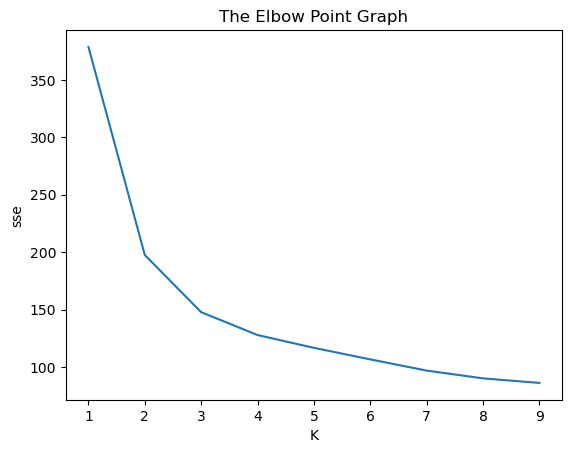

In [47]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)
     

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


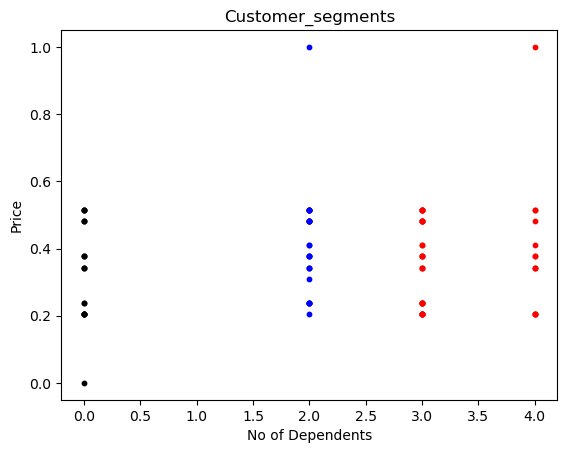

In [49]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


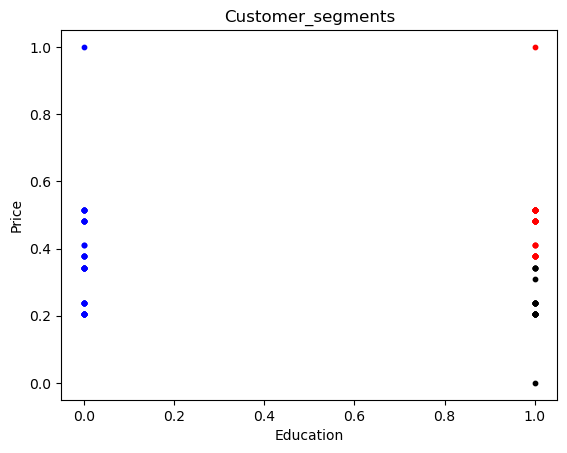

In [50]:

clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


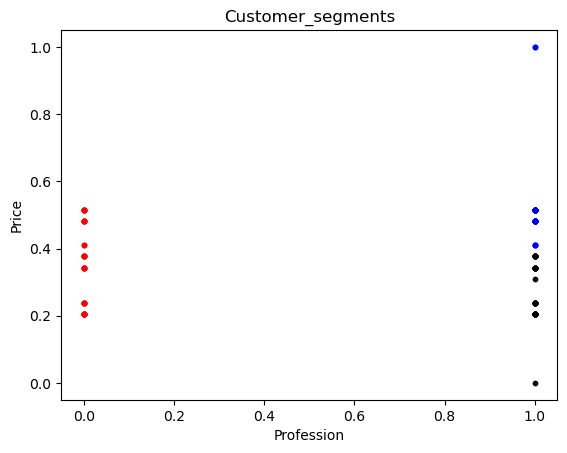

In [51]:
clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"]) 
     

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


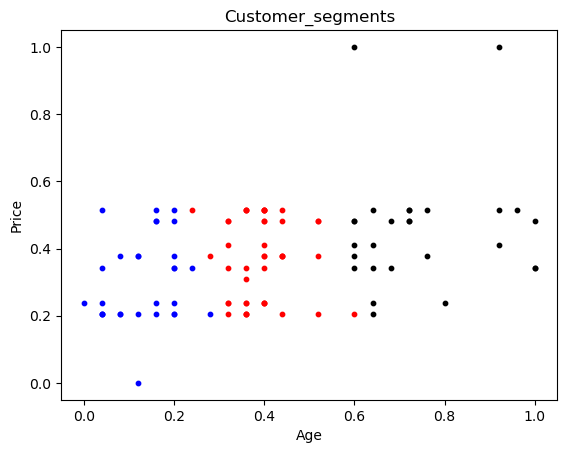

In [52]:
clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


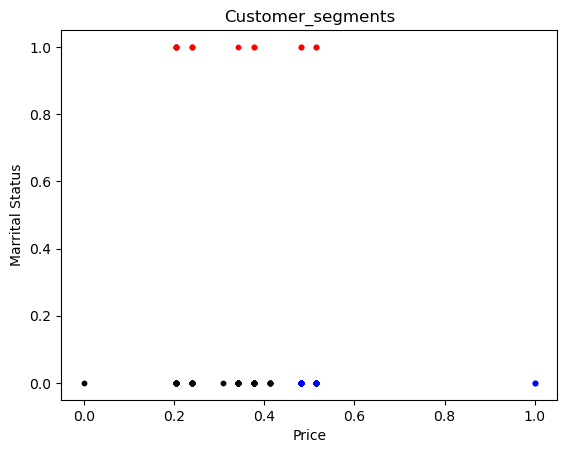

In [53]:
clus = d.loc[:,["Price","Marrital Status"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Price","Marrital Status"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


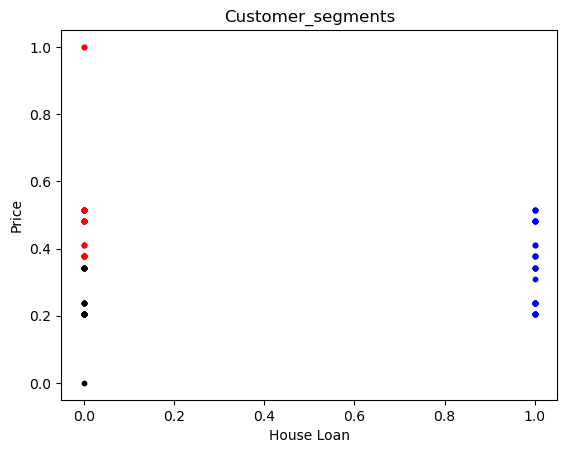

In [54]:
clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


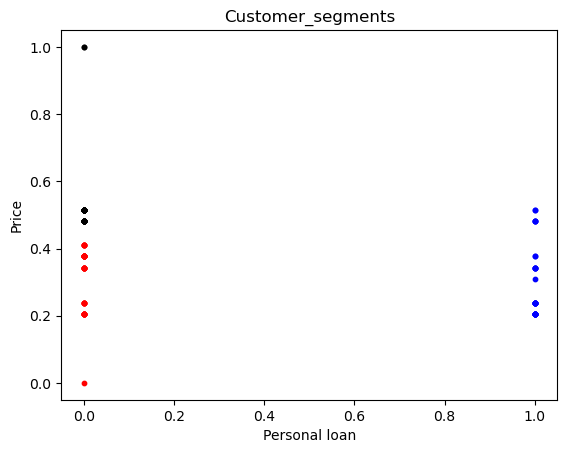

In [55]:
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"]) 
     

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


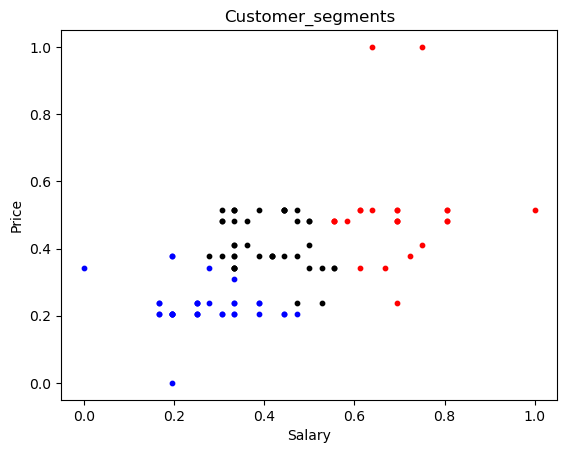

In [56]:
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"]) 

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


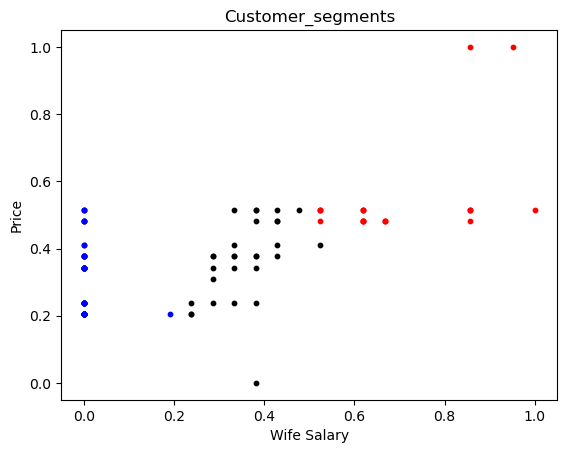

In [57]:

clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"]) 
     

In [59]:
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 
d

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,2
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,1
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,0
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,2
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,2


In [60]:
labels = clustering_kmeans.labels_
     

labels

array([1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2])

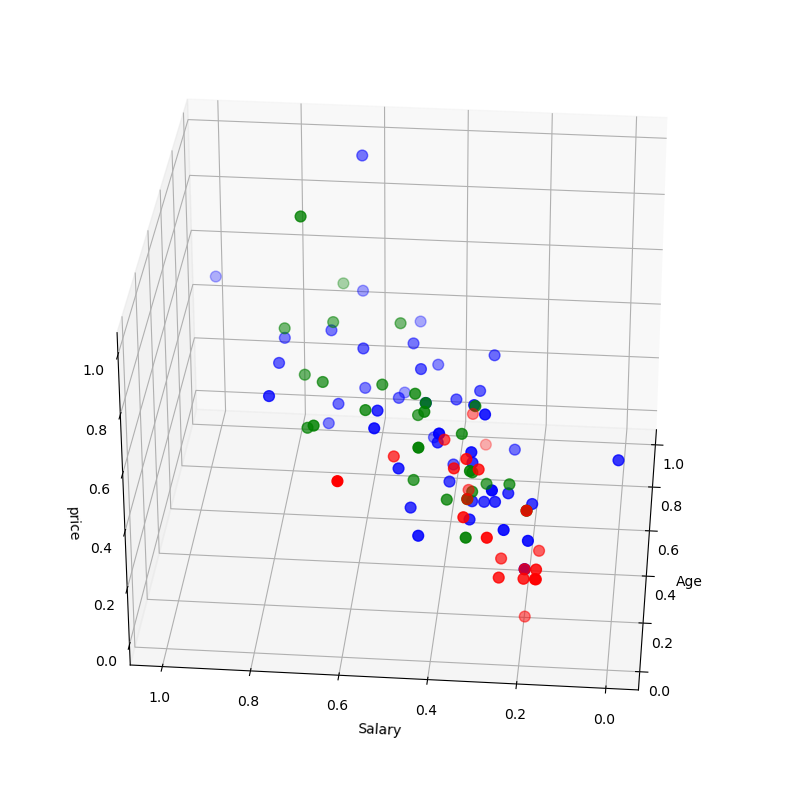

In [61]:
#3 dimentional visualization - Age, Salary, Price

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

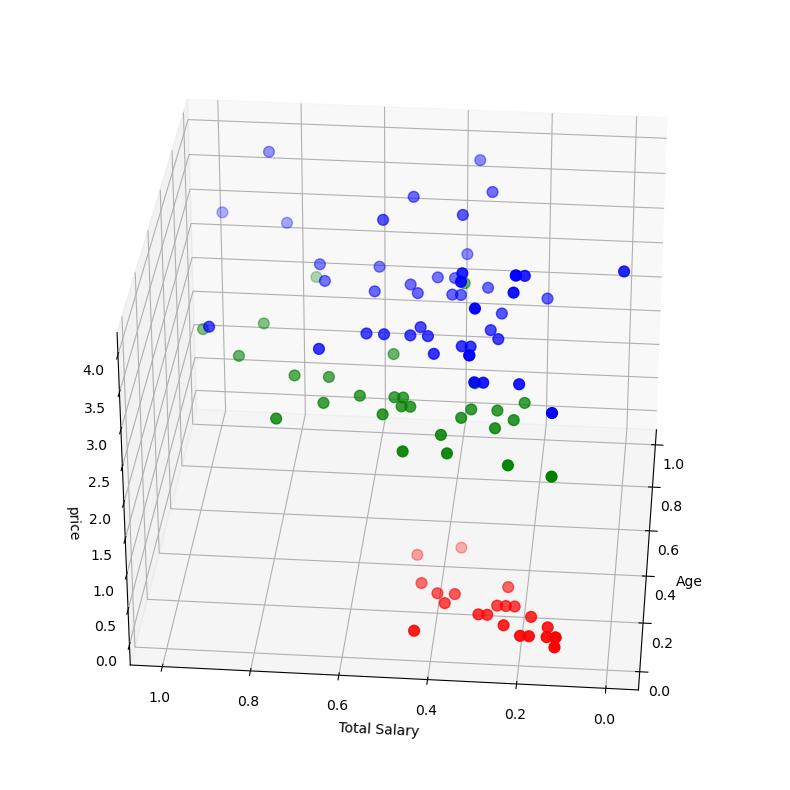

In [62]:
#3-D PLOT - PRICE, NO OF DEPENDENTS, TOTAL SALARY

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()
     

In [63]:
#Clustering According to the type and model of the vehicle owned

feature = list(data_car.columns)
dc = data_car[feature] 
     
dc
     

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3


In [64]:
x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled

dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,8
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,1
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,4
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,6
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,6
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,1
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,3


In [65]:
k_range1 = range(1,10)
#sum of squared error
ssec = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(dc)
  ssec.append(km.inertia_)
     
ssec

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[1076.5680399367827,
 480.4043865992121,
 375.1105031533179,
 288.1278894579031,
 237.25907368379737,
 202.73577880733686,
 187.35116131174604,
 174.93153285268227,
 165.37076116705163]

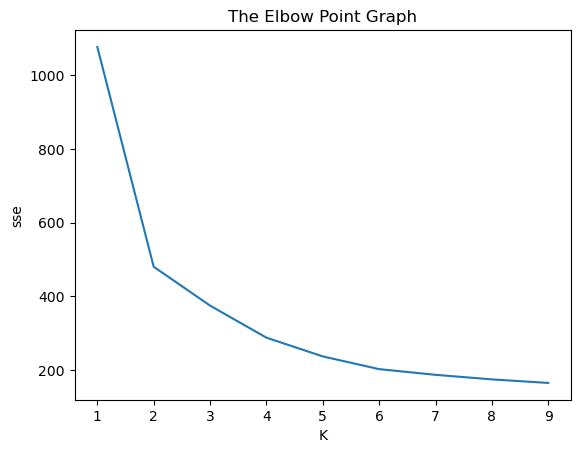

In [66]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


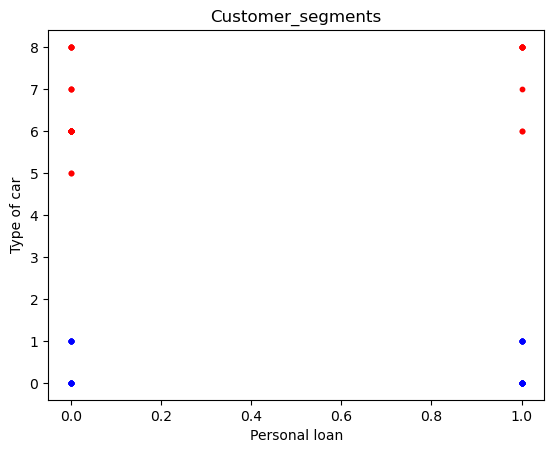

In [67]:
def plotsegm(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()
     

clus = dc.loc[:,["Personal loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Personal loan","Type of car"])

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


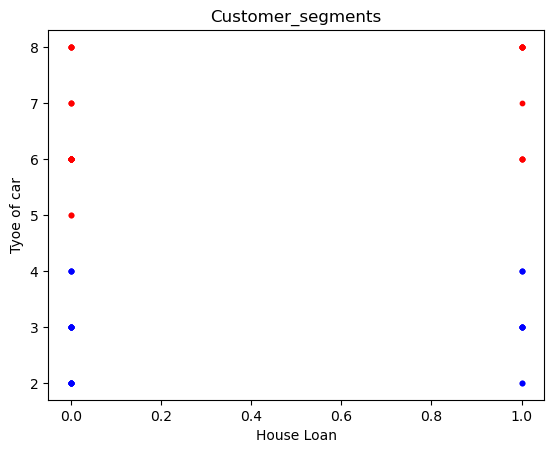

In [68]:
clus = dc.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Tyoe of car"])

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


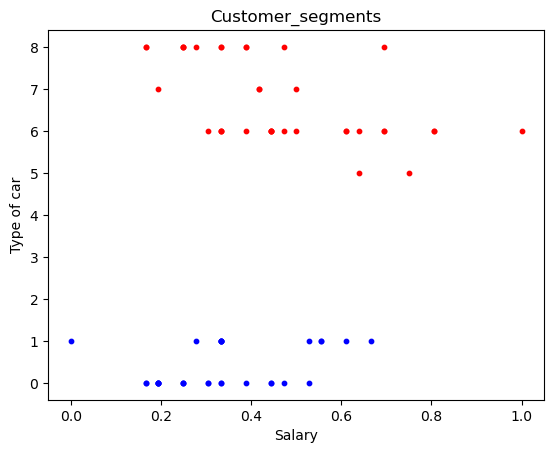

In [69]:
clus = dc.loc[:,["Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Salary","Type of car"])

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


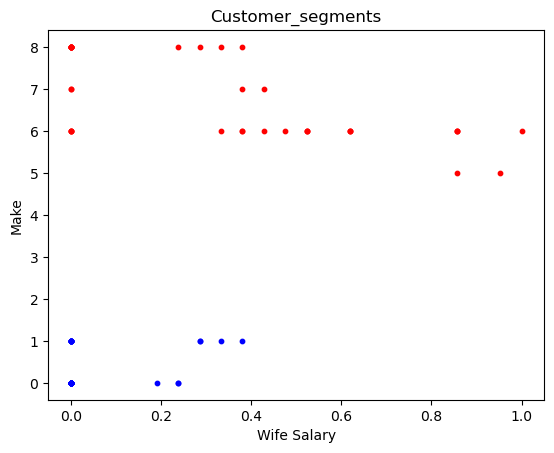

In [70]:
clus = dc.loc[:,["Wife Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Wife Salary","Make"])

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


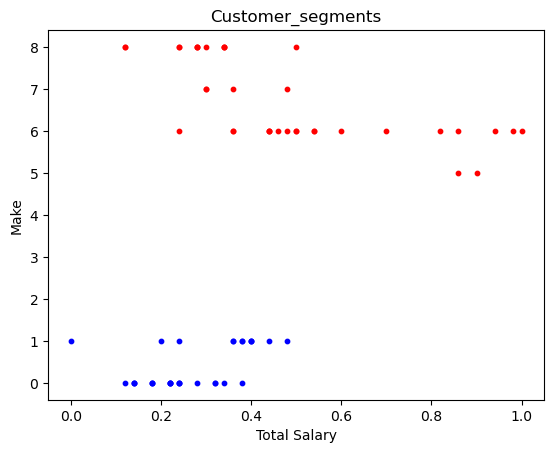

In [71]:
clus = dc.loc[:,["Total Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Total Salary","Make"])
     

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


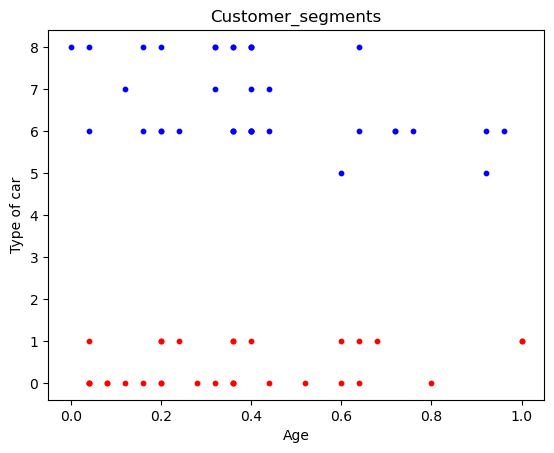

In [72]:
#Age	Profession	Marrital Status	Education	No of Dependents	
clus = dc.loc[:,["Age","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Age","Type of car"])

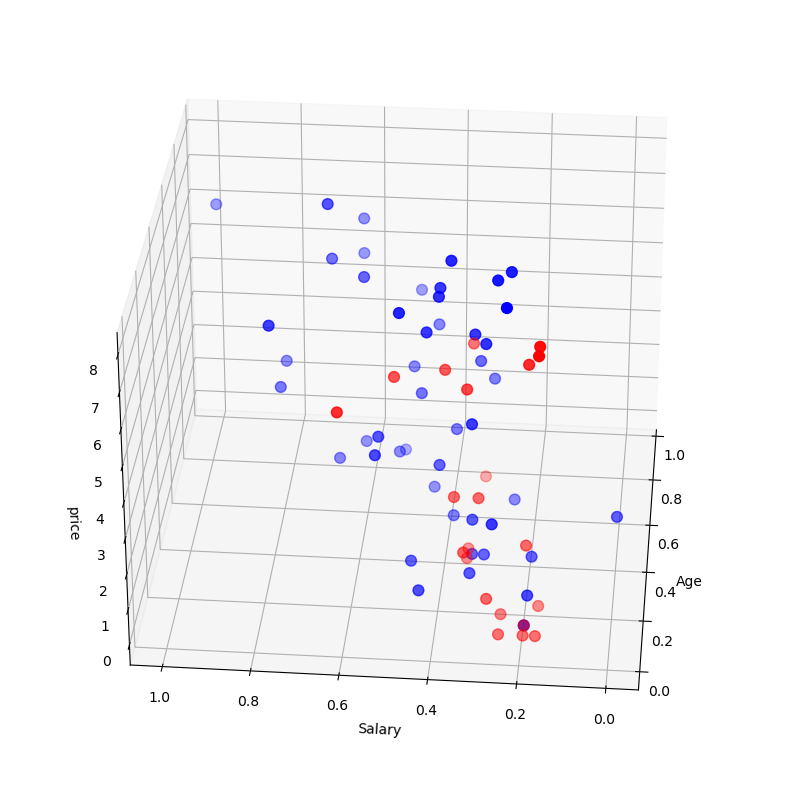

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dc.Age[labels == 0], dc["Salary"][labels == 0], dc["Make"][labels == 0],  c='blue', s=60)
ax.scatter(dc.Age[labels == 1], dc["Salary"][labels == 1], dc["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()
     

In [75]:
#Displaying the rows in same clusters at one place(According to price)

p=d[d.clusters==1]
p

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
12,0.12,1,0,1,0,0,0,1,0.194444,0.380952,0.30,0.000000,1
16,0.00,1,1,1,0,0,0,0,0.166667,0.000000,0.12,0.238754,1
17,0.04,1,1,0,0,1,0,1,0.166667,0.000000,0.12,0.204152,1
19,0.16,1,0,0,0,0,0,1,0.166667,0.238095,0.22,0.204152,1
36,0.12,0,0,1,0,0,0,1,0.194444,0.333333,0.28,0.377163,1
37,0.16,1,0,1,0,0,0,1,0.305556,0.380952,0.38,0.480969,1
38,0.16,0,1,1,0,0,0,0,0.333333,0.000000,0.24,0.515571,1
39,0.20,1,0,0,0,0,0,1,0.333333,0.380952,0.40,0.342561,1
41,0.24,0,0,1,0,0,0,0,0.333333,0.000000,0.24,0.342561,1


In [76]:
p.shape

(22, 13)

In [77]:
q=d[d.clusters==0]
q

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,0
5,0.08,1,0,0,3,1,1,0,0.194444,0.000000,0.14,0.204152,0
6,0.20,1,0,0,4,0,0,1,0.277778,0.285714,0.32,0.377163,0
7,0.28,0,0,1,4,0,0,0,0.333333,0.000000,0.24,0.204152,0
8,0.32,0,0,1,4,0,0,0,0.500000,0.000000,0.36,0.342561,0
9,0.32,1,0,0,3,1,1,1,0.277778,0.333333,0.34,0.238754,0
10,0.36,1,0,1,4,0,0,1,0.305556,0.333333,0.36,0.515571,0
11,0.36,1,0,0,4,1,1,0,0.333333,0.000000,0.24,0.204152,0
14,0.20,0,0,0,3,1,1,1,0.194444,0.190476,0.22,0.204152,0


In [78]:

q.shape

(48, 13)

In [79]:
r=d[d.clusters==2]
r

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,2
13,0.16,0,1,1,2,1,0,0,0.333333,0.000000,0.24,0.238754,2
18,0.12,1,1,1,2,0,0,0,0.194444,0.000000,0.14,0.377163,2
25,0.36,1,0,0,2,0,0,1,0.444444,0.523810,0.54,0.515571,2
29,0.40,1,0,1,2,0,0,1,0.444444,0.428571,0.50,0.515571,2
44,0.32,1,0,1,2,1,1,0,0.388889,0.000000,0.28,0.238754,2
47,0.40,0,0,0,2,0,1,1,0.361111,0.523810,0.48,0.411765,2
48,0.40,1,0,1,2,0,1,1,0.250000,0.238095,0.28,0.238754,2
54,0.60,1,0,0,2,0,0,1,0.750000,0.857143,0.90,1.000000,2


In [80]:
r.shape
     

(29, 13)